In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("steam-200k.csv")

In [3]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [4]:
df.isnull().sum().sort_values()

151603712                     0
The Elder Scrolls V Skyrim    0
purchase                      0
1.0                           0
0                             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [6]:
df.describe()

,151603712,1.0,0
count,1.999990e+05,199999.000000,199999.0
mean,1.036556e+08,17.874468,0.0
std,7.208084e+07,138.057292,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


In [7]:
df.columns

Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')

In [8]:
## We need to rename columns so that they make sense: 

df.rename(columns={'151603712':"User_ID", 'The Elder Scrolls V Skyrim':"Game", 'purchase':"Action",
                   '1.0':"No_of_Hours", '0':"Other"}, inplace=True)

In [9]:
df.head()

,User_ID,Game,Action,No_of_Hours,Other
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [10]:
df.loc[df['Action'] == 'play']
df.head()

,User_ID,Game,Action,No_of_Hours,Other
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [11]:
df.loc[df['Action'] == 'play'].describe()


,User_ID,No_of_Hours,Other
count,7.048900e+04,70489.000000,70489.0
mean,1.058812e+08,48.878063,0.0
std,7.150365e+07,229.335236,0.0
min,5.250000e+03,0.100000,0.0
25%,4.934256e+07,1.000000,0.0
50%,9.169067e+07,4.500000,0.0
75%,1.556738e+08,19.100000,0.0
max,3.099031e+08,11754.000000,0.0


In [12]:
df.head()

,User_ID,Game,Action,No_of_Hours,Other
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [13]:
df.groupby(["User_ID","Action"]).count()

Game  No_of_Hours  Other
User_ID   Action                            
5250      play         6            6      6
          purchase    21           21     21
76767     play        20           20     20
          purchase    36           36     36
86540     play        15           15     15
...                  ...          ...    ...
309812026 purchase     2            2      2
309824202 play         1            1      1
          purchase     1            1      1
309903146 play         1            1      1
          purchase     1            1      1

[23743 rows x 3 columns]

In [14]:
values = df.groupby(["User_ID","Action"]).size()

In [15]:
values.head()

User_ID  Action  
5250     play         6
         purchase    21
76767    play        20
         purchase    36
86540    play        15
dtype: int64

In [16]:
print("Number of games : {0}".format(len(df.Game.unique())))
print("Number of users : {0}".format(len(df.User_ID.unique())))
print("Number of total purchases : {0}".format(len(df.loc[df['Action'] == 'purchase'])))
print("Number of total plays infos : {0}".format(len(df.loc[df['Action'] == 'play'])))

Number of games : 5155
Number of users : 12393
Number of total purchases : 129510
Number of total plays infos : 70489


In [17]:
df.shape

(199999, 5)

In [18]:
df.drop_duplicates().sum()

User_ID                                           20670139789284
Game           The Elder Scrolls V SkyrimFallout 4Fallout 4Sp...
Action         playpurchaseplaypurchaseplaypurchaseplaypurcha...
No_of_Hours                                            3574168.8
Other                                                          0
dtype: object

In [19]:
df.describe().astype(int)

,User_ID,No_of_Hours,Other
count,199999,199999,199999
mean,103655626,17,0
std,72080835,138,0
min,5250,0,0
25%,47384202,1,0
50%,86912006,1,0
75%,154230933,1,0
max,309903146,11754,0


In [20]:
df.nunique()

User_ID        12393
Game            5155
Action             2
No_of_Hours     1593
Other              1
dtype: int64

In [21]:
df["Game"].value_counts()

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
                                   ... 
Deep Eclipse                          1
Pizza Frenzy                          1
Warring States                        1
Rocket Mania! Deluxe                  1
Alum                                  1
Name: Game, Length: 5155, dtype: int64

In [22]:
df['Action'].value_counts()

purchase    129510
play         70489
Name: Action, dtype: int64

<AxesSubplot:ylabel='Action'>

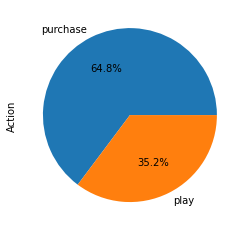

In [23]:
df['Action'].value_counts().plot(kind ='pie',autopct = '%1.1f%%')

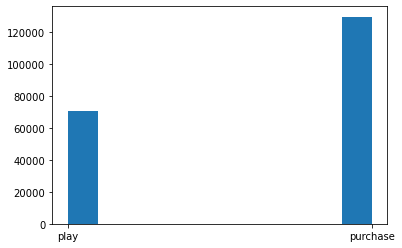

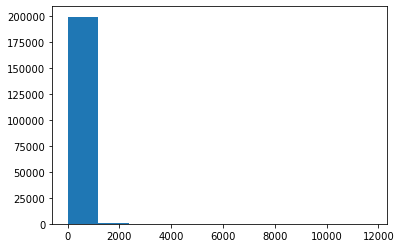

In [24]:
for i in ['Action', 'No_of_Hours']:
    plt.hist(df[i])
    plt.show()

Top 15 games:


<AxesSubplot:>

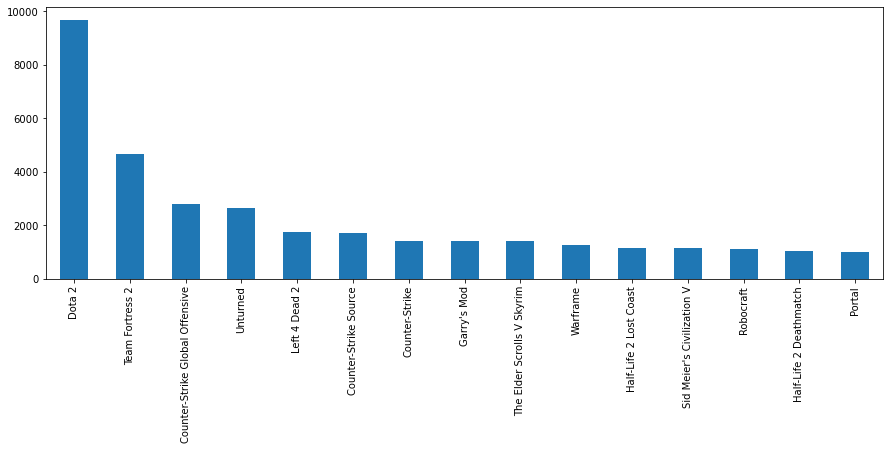

In [25]:
# Plot top 15 games: 

print("Top 15 games:")

df["Game"].value_counts().head(15).plot(kind= 'bar', figsize=(15, 5))

<AxesSubplot:xlabel='Action', ylabel='No_of_Hours'>

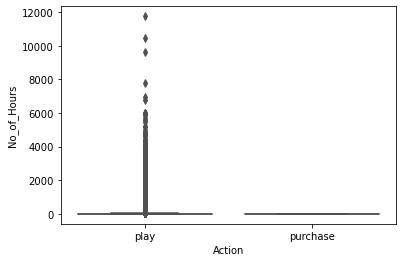

In [26]:
sns.boxplot(x = 'Action',y ='No_of_Hours',data = df,palette='rainbow')


In [27]:
# We can create a variable which tells us a rating for a game based on user id who has spent 2 or more hours 
# Playing a game: 

df= df[(df['No_of_Hours']>=2) & (df['Action']=='play')]

In [28]:
print(df.nunique)

<bound method DataFrame.nunique of           User_ID                            Game Action  No_of_Hours  Other
0       151603712      The Elder Scrolls V Skyrim   play        273.0      0
2       151603712                       Fallout 4   play         87.0      0
4       151603712                           Spore   play         14.9      0
6       151603712               Fallout New Vegas   play         12.1      0
8       151603712                   Left 4 Dead 2   play          8.9      0
...           ...                             ...    ...          ...    ...
199984  128470551                          Nether   play          2.8      0
199986  128470551                    Rogue Legacy   play          2.6      0
199988  128470551  Mortal Kombat Komplete Edition   play          2.5      0
199990  128470551                    Fallen Earth   play          2.4      0
199992  128470551                     Magic Duels   play          2.2      0

[45535 rows x 5 columns]>


In [29]:
df.groupby(by="Action").count()

,User_ID,Game,No_of_Hours,Other
Action,,,,
play,45535,45535,45535,45535


In [30]:
df.head()

,User_ID,Game,Action,No_of_Hours,Other
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,play,8.9,0


In [31]:
df.groupby("Game").count()

,User_ID,Action,No_of_Hours,Other
Game,,,,
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),3,3,3,3
10 Second Ninja,1,1,1,1
"10,000,000",1,1,1,1
100% Orange Juice,4,4,4,4
12 Labours of Hercules,6,6,6,6
...,...,...,...,...
realMyst Masterpiece Edition,2,2,2,2
resident evil 4 / biohazard 4,10,10,10,10
sZone-Online,6,6,6,6


In [32]:
df = df[df.groupby('Game').User_ID.transform(len)>=20]

In [33]:
df['Game'].nunique()

431

In [34]:
df["User_ID"] = df["User_ID"].astype(str)

In [35]:
df.dtypes

User_ID         object
Game            object
Action          object
No_of_Hours    float64
Other            int64
dtype: object

In [43]:
average = df.groupby(['Game'],as_index = False).No_of_Hours.mean()
print(average.min(), average.max())

Game           7 Days to Die
No_of_Hours         3.633333
dtype: object Game            theHunter
No_of_Hours    402.269737
dtype: object


In [48]:
average

,Game,No_of_Hours,Avg_hourplayed
0,7 Days to Die,50.777500,50.777500
1,APB Reloaded,113.377778,113.377778
2,ARK Survival Evolved,105.982813,105.982813
3,Ace of Spades,10.971739,10.971739
4,AdVenture Capitalist,67.760674,67.760674
...,...,...,...
426,Worms Reloaded,12.600000,12.600000
427,Worms Revolution,10.025000,10.025000
428,XCOM Enemy Unknown,53.725175,53.725175
429,Zombie Panic Source,88.833333,88.833333


In [47]:
average["Avg_hourplayed"] = average["No_of_Hours"]

In [49]:
average.drop(columns="No_of_Hours", inplace=True)

In [50]:
average

,Game,Avg_hourplayed
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982813
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674
...,...,...
426,Worms Reloaded,12.600000
427,Worms Revolution,10.025000
428,XCOM Enemy Unknown,53.725175
429,Zombie Panic Source,88.833333
